# Downloading the Mnist Data

In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Reshaping and Normalizing the Images

In [2]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


# Building the Convolutional Neural Network

In [3]:
# Importing the required Keras modules containing model and layers
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Using TensorFlow backend.


# Compiling and Fitting the Model

In [4]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 128s 2ms/step - loss: 0.2196 - accuracy: 0.9344
Epoch 2/10
60000/60000 [==============================] - 126s 2ms/step - loss: 0.0884 - accuracy: 0.9733
Epoch 3/10
60000/60000 [==============================] - 125s 2ms/step - loss: 0.0618 - accuracy: 0.9802
Epoch 4/10
60000/60000 [==============================] - 126s 2ms/step - loss: 0.0461 - accuracy: 0.9851
Epoch 5/10
60000/60000 [==============================] - 125s 2ms/step - loss: 0.0371 - accuracy: 0.9882
Epoch 6/10
60000/60000 [==============================] - 2263s 38ms/step - loss: 0.0321 - accuracy: 0.9890
Epoch 7/10
60000/60000 [==============================] - 130s 2ms/step - loss: 0.0255 - accuracy: 0.9912
Epoch 8/10
60000/60000 [==============================] - 131s 2ms/step - loss: 0.0229 - accuracy: 0.9921
Epoch 9/10
60000/60000 [==============================] - 126s 2ms/step - loss: 0.0213 - accuracy: 0.9926
Epoch 10/10
60000/60000 [===================

# Evaluating the Model

In [5]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 13s 1ms/step


[0.0620268814166669, 0.9853000044822693]

9


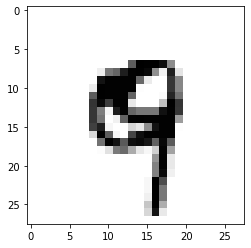

In [8]:
import matplotlib.pyplot as plt
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

3


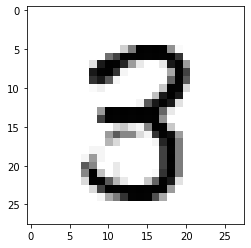

In [7]:
import matplotlib.pyplot as plt
image_index = 8597
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())